# Computing the significance of a weak signal

This continues from the first notebook, so we begin by adding the imports, and generating our weak signal.

In [2]:
# standard imports
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.signal

def make_signal_and_data(
    signal_loudness,
    random_seed=21,
    sample_rate = 32, # 32 samples per second
    length_of_data = 128, # 128 seconds worth of data. MUST BE A MULTIPLE OF 8!
    signal_gaussian_width = 1.,
    signal_chirpiness = 1.,
):

    # Some settings for the data
    num_data_samples = length_of_data*sample_rate # 128 seconds worth of data
    times = np.arange(num_data_samples) / sample_rate

    # Make the signal
    signal_inst_frequency = 2. + signal_chirpiness*np.sin(2 * np.pi * 0.1 * times)
    phases = [0]
    for i in range(1,len(times)):
        phases.append(phases[-1] + 2 * np.pi * signal_inst_frequency[i] * 1./sample_rate)
    signal = np.sin(phases)
    gaussian = np.exp( - (times - 64)**2 / (2 * signal_gaussian_width))
    signal = gaussian * np.sin(phases)
    # This takes a quarter of the signal (centered on the peak) to add to the data.
    # The signal should be 0, or close to it, outside of this period.
    signal = signal[length_of_data*3//8 * sample_rate:length_of_data*5//8 * sample_rate]

    # Make the noise, and add a signal to the noise at an unknown spot
    # Set seed so we get the same dataset!
    np.random.seed(random_seed)
    noise = np.random.normal(size=[num_data_samples])
    rndi = np.random.randint(0,sample_rate*(length_of_data*3//4))
    data = noise
    data[rndi:rndi+len(signal)] += signal*signal_loudness
    
    return data, signal



In [3]:
signal_loudness = 0.9
data, signal = make_signal_and_data(signal_loudness)


Text(0, 0.5, 'Cross correlation')

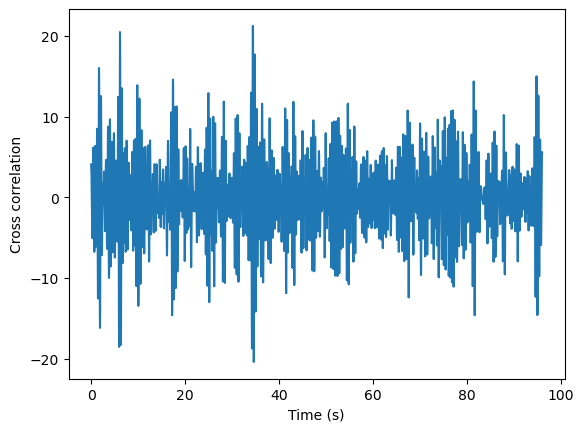

In [4]:
# We also reproduce the plot from earlier, again you need a cross-correlation function here
from crosscorr_utils import compute_cross_correlation
cc = compute_cross_correlation(signal, data)
plt.plot(np.arange(32*96) / 32, cc)
plt.xlabel('Time (s)')
plt.ylabel('Cross correlation')

## EXERCISE: compute significance

Now we will compute significance of this weak signal (it's between 30 and 40s if you didn't spot it earlier).

### Step 1

Create a 128-second long stretch of random noise (in the same way as we did for the data above, but now without a signal added) .. HINT: We might have already provided the function to do this, but remember that you will need to change the random seed!. Cross-correlate with the signal. What is the loudest value that you see?

In [5]:
# Complete STEP 1 here

### Step 2

Repeat the process 1000 times (again, make sure a different random seed is used each time!). Each time record the loudest value in the noise-only cross-correlation.

In [6]:
# Complete STEP 2 here

## Step 3

How many times is the maximum cross-correlation louder than it was for the cross correlation with the weak signal in the data? This gives you the rate of false alarm.

If you see louder values in 500 of the 1000 iterations, then the false-alarm rate of our weak signal is one per 2 experiments. As the experiment was 128 seconds long, but only 96s was usable because of the signal length, the rate of false alarms of equal or greater significance to our weak signal is once every 192 seconds. So the false alarm rate associated to this event is 1/192 per second  ... or 18.75 an hour (in perhaps more easy to digest units).

In [7]:
# Complete STEP 3 here

## Step 4

If you haven't already, please consider optimising your cross-correlation function! Can you get the same result as in Step 3 quicker? Refer to our optimization lecture for more information on this.

In [8]:
# Complete STEP 4 here

## Summary

Congratulations! You have computed the false alarm rate of this weak event, a measure of it's significance. We couldn't say for sure (if we didn't already know) if this event was real or not, but we can *quantify* our belief in it being real.